# tables.ipynb

Build tables of the latest COVID-19 statistics for U.S. counties.

Inputs:
* `data/us_counties_clean.csv`: The contents of `data/us_counties.csv` after data cleaning by `clean.ipynb`
* `data/us_counties_clean_meta.json`: Column type metadata for reading `data/us_counties_clean.csv` with `pd.read_csv()`


In [1]:
# Initialization boilerplate
import json
import pandas as pd
import numpy as np

from typing import *

import text_extensions_for_pandas as tp

# Local file of utility functions
import util

In [2]:
# Read in the CSV file and apply the saved type information
csv_file = "data/us_counties_clean.csv"
meta_file = "data/us_counties_clean_meta.json"

# Read column type metadata
with open(meta_file) as f:
    cases_meta = json.load(f)

# Pandas does not currently support parsing datetime64 from CSV files.
# As a workaround, read the "Date" column as objects and manually 
# convert after.
cases_meta["Date"] = "object"

cases_vertical = (
    pd
    .read_csv(csv_file, dtype=cases_meta, parse_dates=["Date"])   
    .set_index(["FIPS", "Date"], verify_integrity=True)
)
cases_vertical

State   County  Population  Confirmed  Deaths  Recovered  \
FIPS  Date                                                                     
1001  2020-01-22  Alabama  Autauga       55869          0       0          0   
      2020-01-23  Alabama  Autauga       55869          0       0          0   
      2020-01-24  Alabama  Autauga       55869          0       0          0   
      2020-01-25  Alabama  Autauga       55869          0       0          0   
      2020-01-26  Alabama  Autauga       55869          0       0          0   
...                   ...      ...         ...        ...     ...        ...   
56045 2020-04-18  Wyoming   Weston        6927          0       0          0   
      2020-04-19  Wyoming   Weston        6927          0       0          0   
      2020-04-20  Wyoming   Weston        6927          0       0          0   
      2020-04-21  Wyoming   Weston        6927          0       0          0   
      2020-04-22  Wyoming   Weston        6927          0       0          0   

                  Confirmed_Outlier  Deaths_Outlier  Recovered_Outlier  
FIPS  Date                                                              
1001  2020-01-22              False           False              False  
      2020-01-23              False           False              False  
      2020-01-24              False           False              False  
      2020-01-25              False           False              False  
      2020-01-26              False           False              False  
...                             ...             ...                ...  
56045 2020-04-18              False           False              False  
      2020-04-19              False           False              False  
      2020-04-20              False           False              False  
      2020-04-21              False           False              False  
      2020-04-22              False           False              False  

[289064 rows x 9 columns]

In [3]:
# Normalize the Confirmed and Deaths counts by population.
cases = cases_vertical.copy()
cases["Confirmed_per_100"] = cases["Confirmed"] / cases["Population"] * 100
cases["Deaths_per_100"] = cases["Deaths"] / cases["Population"] * 100
cases

State   County  Population  Confirmed  Deaths  Recovered  \
FIPS  Date                                                                     
1001  2020-01-22  Alabama  Autauga       55869          0       0          0   
      2020-01-23  Alabama  Autauga       55869          0       0          0   
      2020-01-24  Alabama  Autauga       55869          0       0          0   
      2020-01-25  Alabama  Autauga       55869          0       0          0   
      2020-01-26  Alabama  Autauga       55869          0       0          0   
...                   ...      ...         ...        ...     ...        ...   
56045 2020-04-18  Wyoming   Weston        6927          0       0          0   
      2020-04-19  Wyoming   Weston        6927          0       0          0   
      2020-04-20  Wyoming   Weston        6927          0       0          0   
      2020-04-21  Wyoming   Weston        6927          0       0          0   
      2020-04-22  Wyoming   Weston        6927          0       0          0   

                  Confirmed_Outlier  Deaths_Outlier  Recovered_Outlier  \
FIPS  Date                                                               
1001  2020-01-22              False           False              False   
      2020-01-23              False           False              False   
      2020-01-24              False           False              False   
      2020-01-25              False           False              False   
      2020-01-26              False           False              False   
...                             ...             ...                ...   
56045 2020-04-18              False           False              False   
      2020-04-19              False           False              False   
      2020-04-20              False           False              False   
      2020-04-21              False           False              False   
      2020-04-22              False           False              False   

                  Confirmed_per_100  Deaths_per_100  
FIPS  Date                                           
1001  2020-01-22                0.0             0.0  
      2020-01-23                0.0             0.0  
      2020-01-24                0.0             0.0  
      2020-01-25                0.0             0.0  
      2020-01-26                0.0             0.0  
...                             ...             ...  
56045 2020-04-18                0.0             0.0  
      2020-04-19                0.0             0.0  
      2020-04-20                0.0             0.0  
      2020-04-21                0.0             0.0  
      2020-04-22                0.0             0.0  

[289064 rows x 11 columns]

In [4]:
# Pull off the most recent element of each time series.
cases_without_index = cases.reset_index()
last_date = cases_without_index["Date"].max()
cases_by_county = cases_without_index[cases_without_index["Date"] == last_date].set_index("FIPS")
cases_by_county

,Date,State,County,Population,Confirmed,Deaths,Recovered,Confirmed_Outlier,Deaths_Outlier,Recovered_Outlier,Confirmed_per_100,Deaths_per_100
FIPS,,,,,,,,,,,,
1001,2020-04-22,Alabama,Autauga,55869,32,2,0,False,False,False,0.057277,0.003580
1003,2020-04-22,Alabama,Baldwin,223234,132,3,0,False,False,False,0.059131,0.001344
1005,2020-04-22,Alabama,Barbour,24686,29,0,0,False,False,False,0.117475,0.000000
1007,2020-04-22,Alabama,Bibb,22394,34,0,0,False,False,False,0.151826,0.000000
1009,2020-04-22,Alabama,Blount,57826,29,0,0,False,False,False,0.050150,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
56037,2020-04-22,Wyoming,Sweetwater,42343,16,0,0,False,False,False,0.037787,0.000000
56039,2020-04-22,Wyoming,Teton,23464,93,0,0,False,False,False,0.396352,0.000000
56041,2020-04-22,Wyoming,Uinta,20226,7,0,0,False,False,False,0.034609,0.000000


In [5]:
# Build a second table of the same data aggregated at the state level
cases_by_state = (cases_by_county
 .groupby("State")
 .aggregate({
     "Population": "sum",
     "Confirmed": "sum",
     "Deaths": "sum"
 }))
cases_by_state["Confirmed_per_100"] = cases_by_state["Confirmed"] / cases_by_state["Population"] * 100
cases_by_state["Deaths_per_100"] = cases_by_state["Deaths"] / cases_by_state["Population"] * 100

cases_by_state = cases_by_state[["Population", "Confirmed", "Deaths", \
                                 "Confirmed_per_100", "Deaths_per_100"]]
cases_by_state

,Population,Confirmed,Deaths,Confirmed_per_100,Deaths_per_100
State,,,,,
Alabama,4903185,5593,196,0.114069,0.003997
Alaska,731545,335,5,0.045793,0.000683
Arizona,7278717,5473,231,0.075192,0.003174
Arkansas,3017804,2181,42,0.072271,0.001392
California,39512223,37344,1419,0.094513,0.003591
Colorado,5758736,10796,505,0.187472,0.008769
Connecticut,3565287,21919,1540,0.614789,0.043194
Delaware,973764,3172,89,0.325746,0.009140
District of Columbia,705749,3206,127,0.454269,0.017995


In [6]:
# Now our data prep is done and we can start analyzing.

# The latest nationwide totals
cases_by_state[["Confirmed", "Deaths"]].sum()

Confirmed    830990
Deaths        45874
dtype: int64

In [7]:
# Today's nationwide totals, computed from the county-level data
cases_by_county[["Confirmed", "Deaths"]].sum()

Confirmed    830990
Deaths        45874
dtype: int64

In [8]:
# Top 10 states by confirmed cases:
cases_by_state.sort_values("Confirmed", ascending=False).head(10)

,Population,Confirmed,Deaths,Confirmed_per_100,Deaths_per_100
State,,,,,
New York,19453561,263290,19410,1.353428,0.099776
New Jersey,8882190,94869,5150,1.068081,0.057981
Massachusetts,6892503,42067,1952,0.610330,0.028321
California,39512223,37344,1419,0.094513,0.003591
Pennsylvania,12801989,36082,1673,0.281847,0.013068
Illinois,12671821,34879,1564,0.275249,0.012342
Michigan,9986857,33214,2787,0.332577,0.027907
Florida,21477737,28309,893,0.131806,0.004158
Louisiana,4648794,25198,1472,0.542033,0.031664


In [9]:
# Top 10 states by confirmed cases per 100 residents
cases_by_state.sort_values("Confirmed_per_100", ascending=False).head(10)

,Population,Confirmed,Deaths,Confirmed_per_100,Deaths_per_100
State,,,,,
New York,19453561,263290,19410,1.353428,0.099776
New Jersey,8882190,94869,5150,1.068081,0.057981
Connecticut,3565287,21919,1540,0.614789,0.043194
Massachusetts,6892503,42067,1952,0.610330,0.028321
Louisiana,4648794,25198,1472,0.542033,0.031664
Rhode Island,1059361,4946,3,0.466885,0.000283
District of Columbia,705749,3206,127,0.454269,0.017995
Michigan,9986857,33214,2787,0.332577,0.027907
Delaware,973764,3172,89,0.325746,0.009140


In [10]:
# Top 10 states by deaths per 100 residents
cases_by_state.sort_values("Deaths_per_100", ascending=False).head(10)

,Population,Confirmed,Deaths,Confirmed_per_100,Deaths_per_100
State,,,,,
New York,19453561,263290,19410,1.353428,0.099776
New Jersey,8882190,94869,5150,1.068081,0.057981
Connecticut,3565287,21919,1540,0.614789,0.043194
Louisiana,4648794,25198,1472,0.542033,0.031664
Massachusetts,6892503,42067,1952,0.610330,0.028321
Michigan,9986857,33214,2787,0.332577,0.027907
District of Columbia,705749,3206,127,0.454269,0.017995
Pennsylvania,12801989,36082,1673,0.281847,0.013068
Illinois,12671821,34879,1564,0.275249,0.012342


In [11]:
# Top 20 counties by total confirmed cases.
cases_by_county.sort_values("Confirmed", ascending=False).head(20)

,Date,State,County,Population,Confirmed,Deaths,Recovered,Confirmed_Outlier,Deaths_Outlier,Recovered_Outlier,Confirmed_per_100,Deaths_per_100
FIPS,,,,,,,,,,,,
36047,2020-04-22,New York,Kings,2559903,45229,4628,0,False,False,False,1.766825,0.180788
36081,2020-04-22,New York,Queens,2253858,39821,4075,0,False,False,False,1.766793,0.180801
36059,2020-04-22,New York,Nassau,1356924,31555,1431,0,False,False,False,2.325480,0.105459
36103,2020-04-22,New York,Suffolk,1476601,28854,926,0,False,False,False,1.954082,0.062712
36061,2020-04-22,New York,New York,1628706,28776,2944,0,False,False,False,1.766801,0.180757
36119,2020-04-22,New York,Westchester,967506,25276,838,0,False,False,False,2.612490,0.086614
36005,2020-04-22,New York,Bronx,1418207,25057,2564,0,False,False,False,1.766808,0.180792
17031,2020-04-22,Illinois,Cook,5150233,24546,1072,0,False,False,False,0.476600,0.020815
6037,2020-04-22,California,Los Angeles,10039107,16447,732,0,False,False,False,0.163829,0.007291


In [12]:
# Top 20 counties by confirmed cases per 100 residents
cases_by_county.sort_values("Confirmed_per_100", ascending=False).head(20)

,Date,State,County,Population,Confirmed,Deaths,Recovered,Confirmed_Outlier,Deaths_Outlier,Recovered_Outlier,Confirmed_per_100,Deaths_per_100
FIPS,,,,,,,,,,,,
5079,2020-04-22,Arkansas,Lincoln,13024,445,0,0,False,False,False,3.416769,0.000000
39101,2020-04-22,Ohio,Marion,65093,2137,3,0,False,False,False,3.282995,0.004609
36087,2020-04-22,New York,Rockland,325789,9699,401,0,False,False,False,2.977080,0.123086
39129,2020-04-22,Ohio,Pickaway,58457,1658,5,0,False,False,False,2.836273,0.008553
36119,2020-04-22,New York,Westchester,967506,25276,838,0,False,False,False,2.612490,0.086614
36059,2020-04-22,New York,Nassau,1356924,31555,1431,0,False,False,False,2.325480,0.105459
19115,2020-04-22,Iowa,Louisa,11035,248,2,0,False,False,False,2.247395,0.018124
13243,2020-04-22,Georgia,Randolph,6778,148,17,0,False,False,False,2.183535,0.250811
16013,2020-04-22,Idaho,Blaine,23021,480,5,0,False,False,False,2.085053,0.021719


In [13]:
# Top 20 counties by *deaths* per 100 residents
cases_by_county.sort_values("Deaths_per_100", ascending=False).head(20)

,Date,State,County,Population,Confirmed,Deaths,Recovered,Confirmed_Outlier,Deaths_Outlier,Recovered_Outlier,Confirmed_per_100,Deaths_per_100
FIPS,,,,,,,,,,,,
13243,2020-04-22,Georgia,Randolph,6778,148,17,0,False,False,False,2.183535,0.250811
13273,2020-04-22,Georgia,Terrell,8531,159,18,0,False,False,False,1.863791,0.210995
36081,2020-04-22,New York,Queens,2253858,39821,4075,0,False,False,False,1.766793,0.180801
36005,2020-04-22,New York,Bronx,1418207,25057,2564,0,False,False,False,1.766808,0.180792
36047,2020-04-22,New York,Kings,2559903,45229,4628,0,False,False,False,1.766825,0.180788
36061,2020-04-22,New York,New York,1628706,28776,2944,0,False,False,False,1.766801,0.180757
36085,2020-04-22,New York,Richmond,476143,8412,860,0,False,False,False,1.766696,0.180618
22095,2020-04-22,Louisiana,St. John the Baptist,42837,704,57,0,False,False,False,1.643439,0.133063
30101,2020-04-22,Montana,Toole,4736,29,6,0,False,False,False,0.612331,0.126689


In [14]:
# Group together counties from each decile of population
quantiles = cases_by_county["Population"].quantile(
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Start by binning the latest data.
cases_with_bin = cases_by_county.copy()
cases_with_bin["pop_bin"] = pd.cut(cases_with_bin["Population"], 
                                   bins=([0.0] + quantiles.to_list()))

cases_by_bin = cases_with_bin.groupby(["Date", "pop_bin"]).aggregate({
    "Confirmed": "sum",
    "Deaths": "sum",
    "Population": "sum"
})
cases_by_bin["Confirmed_per_100"] = cases_by_bin["Confirmed"] / cases_by_bin["Population"] * 100
cases_by_bin["Deaths_per_100"] = cases_by_bin["Deaths"] / cases_by_bin["Population"] * 100
cases_by_bin = cases_by_bin.reset_index()
cases_by_bin

,Date,pop_bin,Confirmed,Deaths,Population,Confirmed_per_100,Deaths_per_100
0,2020-04-22,"(0.0, 4992.2]",355,14,872420,0.040691,0.001605
1,2020-04-22,"(4992.2, 8808.4]",1659,107,2184561,0.075942,0.004898
2,2020-04-22,"(8808.4, 13335.6]",2896,78,3456224,0.083791,0.002257
3,2020-04-22,"(13335.6, 18693.0]",3559,140,5000037,0.071179,0.002800
4,2020-04-22,"(18693.0, 25726.0]",7706,295,6934301,0.111129,0.004254
5,2020-04-22,"(25726.0, 36743.0]",8647,378,9707534,0.089075,0.003894
6,2020-04-22,"(36743.0, 54018.7]",13240,575,13857842,0.095542,0.004149
7,2020-04-22,"(54018.7, 94275.6]",23721,870,22136348,0.107159,0.003930
8,2020-04-22,"(94275.6, 213707.3]",52579,2311,44626025,0.117821,0.005179
9,2020-04-22,"(213707.3, 10039107.0]",716628,41106,219464231,0.326535,0.018730


In [15]:
# Make sure we didn't drop any counties from the above table
confirmed_before = cases_by_county["Confirmed"].sum()
confirmed_after = cases_by_bin["Confirmed"].sum()
if confirmed_before != confirmed_after:
    raise ValueError(f"{confirmed_before} should equal {confirmed_after} "
                     f" (difference is {confirmed_before - confirmed_after})")

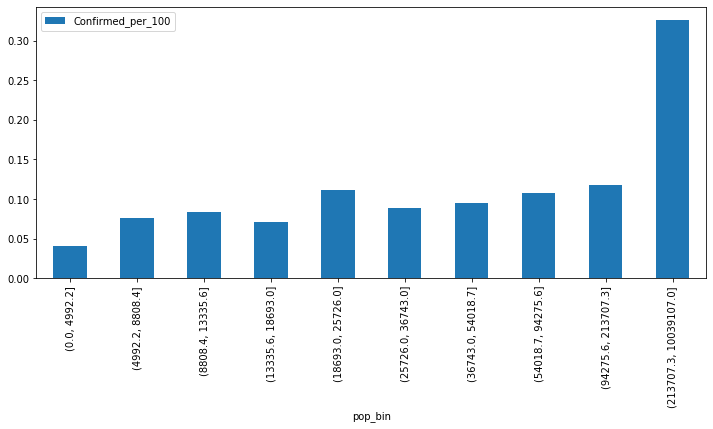

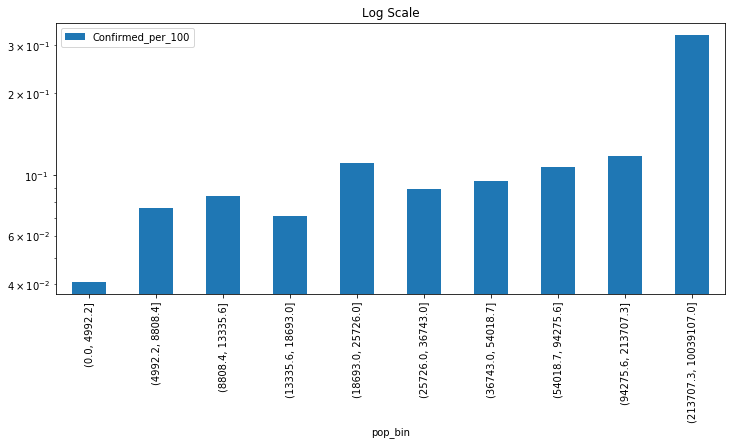

In [16]:
# Plot the relationship between confirmed cases per 100 residents and population
# in just the latest stats
FIGSIZE=(12,5)
cases_by_bin.plot.bar(x="pop_bin", y="Confirmed_per_100", figsize=FIGSIZE)
cases_by_bin.plot.bar(x="pop_bin", y="Confirmed_per_100", figsize=FIGSIZE,
                      logy=True, title="Log Scale")

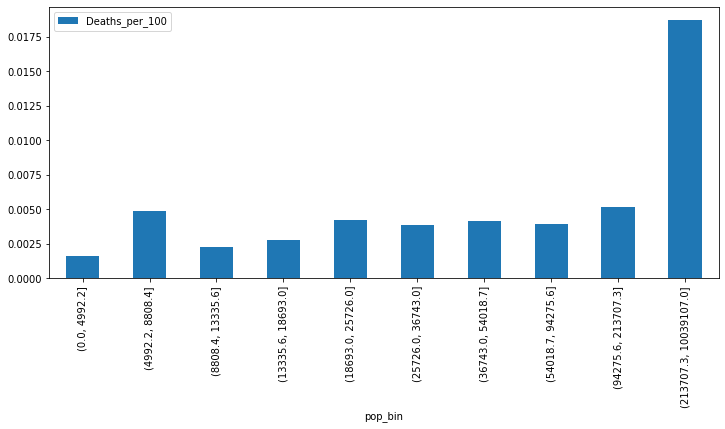

In [ ]:
# Plot the relationship between deaths per 100 residents and population
cases_by_bin.plot.bar(x="pop_bin", y="Deaths_per_100", figsize=FIGSIZE)
cases_by_bin.plot.bar(x="pop_bin", y="Deaths_per_100", figsize=FIGSIZE,
                      logy=True, title="Log Scale")